# LIBRARY IMPORTS

In [2]:
!pip install wrds
!pip install pandas==2.0.3
!pip install scipy==1.11.4
!pip install packaging==24.0
!pip install --upgrade numpy
!pip install --upgrade statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wrds 3.2.0 requires pandas<2.3,>=2.2, but you have pandas 2.0.3 which is incompatible.
wrds 3.2.0 requires scipy<1.13,>=1.12, but you have scipy 1.11.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wr

In [1]:
import os
os.getcwd()
import pandas as pd
import numpy as np
import datetime
import wrds
import pandas_datareader
from pandas.tseries.offsets import *
from pandas.tseries.offsets import MonthEnd
import pandas_datareader.data as web
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import yfinance as yf
import tabulate
#@M4sterAdr!en
id_wrds = ''

# WRDS DATA IMPORTS

In [41]:
conn = wrds.Connection()
 # Query for monthly returns, industry codes, and stock tickers
query = """
SELECT a.permno, a.date, a.ret, b.siccd, a.prc, a.shrout, (a.prc * a.shrout) AS market_cap, b.ticker
FROM crsp.msf AS a
LEFT JOIN crsp.msenames AS b
ON a.permno = b.permno
AND b.namedt <= a.date
AND a.date <= b.nameendt
WHERE a.date >= '2000-01-01'
"""
data = conn.raw_sql(query)

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Calculate market capitalization
data['market_cap'] = data['prc'].abs() * data['shrout']

# Close WRDS connection
conn.close()


Enter your WRDS username [root]:adrien23
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: n
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head()

,permno,date,ret,siccd,prc,shrout,market_cap,ticker
0,10016,2000-01-31,-0.099338,3560.0,17.00000,17869.0,303773.00000,SCTT
1,10016,2000-02-29,0.132353,3560.0,19.25000,17869.0,343978.25000,SCTT
2,10016,2000-03-31,-0.019481,3560.0,18.87500,16918.0,319327.25000,SCTT
3,10016,2000-04-28,0.033113,3560.0,19.50000,16947.0,330466.50000,SCTT
4,10016,2000-05-31,-0.062500,3560.0,18.28125,16947.0,309812.34375,SCTT


In [ ]:
def map_sic_to_industry(sic_code):
    if sic_code is None:
        return 'Unknown'
    elif 100 <= sic_code <= 199 or 200 <= sic_code <= 299 or 700 <= sic_code <= 799 or 910 <= sic_code <= 919 or sic_code == 2048:
        return 'Agriculture'
    elif 2000 <= sic_code <= 2009 or 2010 <= sic_code <= 2019 or 2020 <= sic_code <= 2029 or 2030 <= sic_code <= 2039 or 2040 <= sic_code <= 2046 or 2050 <= sic_code <= 2059 or 2060 <= sic_code <= 2063 or 2070 <= sic_code <= 2079 or 2090 <= sic_code <= 2092 or sic_code == 2095 or 2098 <= sic_code <= 2099:
        return 'Food'
    elif 2064 <= sic_code <= 2068 or sic_code == 2086 or sic_code == 2087 or sic_code == 2096 or sic_code == 2097:
        return 'Soda'
    elif 2080 <= sic_code <= 2085:
        return 'Beer'
    elif 2100 <= sic_code <= 2199:
        return 'Smoke'
    elif 920 <= sic_code <= 999 or 3650 <= sic_code <= 3651 or sic_code == 3652 or sic_code == 3732 or 3930 <= sic_code <= 3931 or 3940 <= sic_code <= 3949:
        return 'Toys'
    elif 7800 <= sic_code <= 7829 or 7830 <= sic_code <= 7833 or 7840 <= sic_code <= 7841 or sic_code == 7900 or 7910 <= sic_code <= 7911 or 7920 <= sic_code <= 7929 or 7930 <= sic_code <= 7933 or 7940 <= sic_code <= 7949 or sic_code == 7980 or 7990 <= sic_code <= 7999:
        return 'Fun'
    elif 2700 <= sic_code <= 2709 or 2710 <= sic_code <= 2719 or 2720 <= sic_code <= 2729 or 2730 <= sic_code <= 2739 or 2740 <= sic_code <= 2749 or 2770 <= sic_code <= 2771 or 2780 <= sic_code <= 2789 or 2790 <= sic_code <= 2799:
        return 'Books'
    elif sic_code == 2047 or 2391 <= sic_code <= 2392 or 2510 <= sic_code <= 2519 or 2590 <= sic_code <= 2599 or 2840 <= sic_code <= 2843 or sic_code == 2844 or 3160 <= sic_code <= 3161 or 3170 <= sic_code <= 3171 or sic_code == 3172 or 3190 <= sic_code <= 3199 or sic_code == 3229 or sic_code == 3260 or 3262 <= sic_code <= 3263 or sic_code == 3269 or 3230 <= sic_code <= 3231 or 3630 <= sic_code <= 3639 or 3750 <= sic_code <= 3751 or sic_code == 3800 or 3860 <= sic_code <= 3861 or 3870 <= sic_code <= 3873 or 3910 <= sic_code <= 3911 or sic_code == 3914 or sic_code == 3915 or 3960 <= sic_code <= 3962 or sic_code == 3991 or sic_code == 3995:
        return 'Hshld'
    elif 2300 <= sic_code <= 2390 or 3020 <= sic_code <= 3021 or 3100 <= sic_code <= 3111 or 3130 <= sic_code <= 3131 or 3140 <= sic_code <= 3149 or 3150 <= sic_code <= 3151 or 3963 <= sic_code <= 3965:
        return 'Clths'
    elif 8000 <= sic_code <= 8099:
        return 'Hlth'
    elif sic_code == 3693 or 3840 <= sic_code <= 3849 or 3850 <= sic_code <= 3851:
        return 'MedEq'
    elif sic_code == 2830 or sic_code == 2831 or sic_code == 2833 or sic_code == 2834 or sic_code == 2835 or sic_code == 2836:
        return 'Drugs'
    elif 2800 <= sic_code <= 2809 or 2810 <= sic_code <= 2819 or 2820 <= sic_code <= 2829 or 2850 <= sic_code <= 2859 or 2860 <= sic_code <= 2869 or 2870 <= sic_code <= 2879 or 2890 <= sic_code <= 2899:
        return 'Chems'
    elif sic_code == 3031 or sic_code == 3041 or 3050 <= sic_code <= 3053 or 3060 <= sic_code <= 3069 or 3070 <= sic_code <= 3079 or 3080 <= sic_code <= 3089 or 3090 <= sic_code <= 3099:
        return 'Rubbr'
    elif 2200 <= sic_code <= 2269 or 2270 <= sic_code <= 2279 or 2280 <= sic_code <= 2284 or 2290 <= sic_code <= 2295 or sic_code == 2297 or sic_code == 2298 or sic_code == 2299 or 2393 <= sic_code <= 2395 or 2397 <= sic_code <= 2399:
        return 'Txtls'
    elif 800 <= sic_code <= 899 or 2400 <= sic_code <= 2439 or 2450 <= sic_code <= 2459 or 2490 <= sic_code <= 2499 or 2660 <= sic_code <= 2661 or 2950 <= sic_code <= 2952 or sic_code == 3200 or 3210 <= sic_code <= 3211 or 3240 <= sic_code <= 3241 or 3250 <= sic_code <= 3259 or sic_code == 3261 or sic_code == 3264 or 3270 <= sic_code <= 3275 or 3280 <= sic_code <= 3281 or 3290 <= sic_code <= 3293 or sic_code == 3295 or 3420 <= sic_code <= 3429 or 3430 <= sic_code <= 3433 or 3440 <= sic_code <= 3441 or sic_code == 3442 or sic_code == 3446 or sic_code == 3448 or sic_code == 3449 or 3450 <= sic_code <= 3451 or sic_code == 3452 or 3490 <= sic_code <= 3499 or sic_code == 3996:
        return 'BldMt'
    elif 1500 <= sic_code <= 1511 or 1520 <= sic_code <= 1529 or 1530 <= sic_code <= 1539 or 1540 <= sic_code <= 1549 or 1600 <= sic_code <= 1699 or 1700 <= sic_code <= 1799:
        return 'Cnstr'
    elif sic_code == 3300 or 3310 <= sic_code <= 3317 or 3320 <= sic_code <= 3325 or 3330 <= sic_code <= 3339 or sic_code == 3340 or 3350 <= sic_code <= 3357 or 3360 <= sic_code <= 3369 or 3370 <= sic_code <= 3379 or 3390 <= sic_code <= 3399:
        return 'Steel'
    elif sic_code == 3400 or sic_code == 3443 or sic_code == 3444 or 3460 <= sic_code <= 3469 or 3470 <= sic_code <= 3479:
        return 'FabPr'
    elif 3510 <= sic_code <= 3519 or 3520 <= sic_code <= 3529 or sic_code == 3530 or sic_code == 3531 or sic_code == 3532 or sic_code == 3533 or sic_code == 3534 or sic_code == 3535 or sic_code == 3536 or sic_code == 3538 or 3540 <= sic_code <= 3549 or 3550 <= sic_code <= 3559 or 3560 <= sic_code <= 3569 or sic_code == 3580 or sic_code == 3581 or sic_code == 3582 or sic_code == 3585 or sic_code == 3586 or 3590 <= sic_code <= 3599:
        return 'Mach'
    elif sic_code == 3600 or 3610 <= sic_code <= 3613 or sic_code == 3620 or 3623 <= sic_code <= 3629 or 3640 <= sic_code <= 3644 or sic_code == 3645 or sic_code == 3646 or 3648 <= sic_code <= 3649 or sic_code == 3660 or sic_code == 3690 or 3691 <= sic_code <= 3692 or sic_code == 3699:
        return 'ElcEq'
    elif sic_code == 2296 or sic_code == 2396 or 3010 <= sic_code <= 3011 or sic_code == 3537 or sic_code == 3647 or sic_code == 3694 or sic_code == 3700 or sic_code == 3710 or sic_code == 3711 or sic_code == 3713 or sic_code == 3714 or sic_code == 3715 or sic_code == 3716 or sic_code == 3792 or 3790 <= sic_code <= 3791 or sic_code == 3799:
        return 'Autos'
    elif sic_code == 3720 or sic_code == 3721 or 3723 <= sic_code <= 3724 or sic_code == 3725 or 3728 <= sic_code <= 3729:
        return 'Aero'
    elif 3730 <= sic_code <= 3731 or 3740 <= sic_code <= 3743:
        return 'Ships'
    elif 3760 <= sic_code <= 3769 or sic_code == 3795 or 3480 <= sic_code <= 3489:
        return 'Guns'
    elif 1040 <= sic_code <= 1049:
        return 'Gold'
    elif 1000 <= sic_code <= 1009 or 1010 <= sic_code <= 1019 or 1020 <= sic_code <= 1029 or 1030 <= sic_code <= 1039 or 1050 <= sic_code <= 1059 or 1060 <= sic_code <= 1069 or 1070 <= sic_code <= 1079 or 1080 <= sic_code <= 1089 or 1090 <= sic_code <= 1099 or 1100 <= sic_code <= 1119 or 1400 <= sic_code <= 1499:
        return 'Mines'
    elif 1200 <= sic_code <= 1299:
        return 'Coal'
    elif sic_code == 1300 or 1310 <= sic_code <= 1319 or 1320 <= sic_code <= 1329 or 1330 <= sic_code <= 1339 or 1370 <= sic_code <= 1379 or sic_code == 1380 or sic_code == 1381 or sic_code == 1382 or sic_code == 1389 or 2900 <= sic_code <= 2912 or 2990 <= sic_code <= 2999:
        return 'Oil'
    elif sic_code == 4900 or 4910 <= sic_code <= 4911 or 4920 <= sic_code <= 4922 or sic_code == 4923 or 4924 <= sic_code <= 4925 or 4930 <= sic_code <= 4931 or sic_code == 4932 or sic_code == 4939 or 4940 <= sic_code <= 4942:
        return 'Util'
    elif sic_code == 4800 or 4810 <= sic_code <= 4813 or 4820 <= sic_code <= 4822 or 4830 <= sic_code <= 4839 or 4840 <= sic_code <= 4841 or 4880 <= sic_code <= 4889 or sic_code == 4890 or sic_code == 4891 or sic_code == 4892 or 4899 <= sic_code <= 4899:
        return 'Telcm'
    elif 7020 <= sic_code <= 7021 or 7030 <= sic_code <= 7033 or sic_code == 7200 or 7210 <= sic_code <= 7212 or sic_code == 7214 or 7215 <= sic_code <= 7216 or sic_code == 7217 or sic_code == 7219 or 7220 <= sic_code <= 7221 or 7230 <= sic_code <= 7231 or 7240 <= sic_code <= 7241 or 7250 <= sic_code <= 7251 or 7260 <= sic_code <= 7269 or 7270 <= sic_code <= 7290 or sic_code == 7291 or 7292 <= sic_code <= 7299 or sic_code == 7395 or sic_code == 7500 or 7520 <= sic_code <= 7529 or 7530 <= sic_code <= 7539 or 7540 <= sic_code <= 7549 or sic_code == 7600 or sic_code == 7620 or sic_code == 7622 or sic_code == 7623 or sic_code == 7629 or 7630 <= sic_code <= 7631 or 7640 <= sic_code <= 7641 or 7690 <= sic_code <= 7699 or 8100 <= sic_code <= 8199 or 8200 <= sic_code <= 8299 or 8300 <= sic_code <= 8399 or 8400 <= sic_code <= 8499 or 8600 <= sic_code <= 8699 or 8800 <= sic_code <= 8899 or 7510 <= sic_code <= 7515:
        return 'PerSv'
    elif 8740 <= sic_code <= 8748 or 8900 <= sic_code <= 8910 or sic_code == 8911 or 8920 <= sic_code <= 8999 or 4220 <= sic_code <= 4229:
        return 'BusSv'
    elif 3570 <= sic_code <= 3579 or sic_code == 3680 or sic_code == 3681 or sic_code == 3682 or sic_code == 3683 or sic_code == 3684 or sic_code == 3685 or sic_code == 3686 or sic_code == 3687 or sic_code == 3688 or sic_code == 3689 or sic_code == 3695 or sic_code == 7373:
        return 'Comps'
    elif sic_code == 3622 or sic_code == 3661 or sic_code == 3662 or sic_code == 3663 or sic_code == 3664 or sic_code == 3665 or sic_code == 3666 or sic_code == 3669 or 3670 <= sic_code <= 3679 or sic_code == 3810 or sic_code == 3812:
        return 'Chips'
    elif sic_code == 3811 or sic_code == 3820 or sic_code == 3821 or sic_code == 3822 or sic_code == 3823 or sic_code == 3824 or sic_code == 3825 or sic_code == 3826 or sic_code == 3827 or sic_code == 3829 or 3830 <= sic_code <= 3839:
        return 'LabEq'
    elif 2520 <= sic_code <= 2549 or 2600 <= sic_code <= 2639 or 2670 <= sic_code <= 2699 or 2760 <= sic_code <= 2761 or 3950 <= sic_code <= 3955:
        return 'Paper'
    elif 2440 <= sic_code <= 2449 or 2640 <= sic_code <= 2659 or sic_code == 3220 or 3221 <= sic_code <= 3221 or 3410 <= sic_code <= 3412:
        return 'Boxes'
    elif 4000 <= sic_code <= 4013 or 4040 <= sic_code <= 4049 or sic_code == 4100 or 4110 <= sic_code <= 4119 or sic_code == 4120 or sic_code == 4121 or sic_code == 4130 or sic_code == 4131 or 4140 <= sic_code <= 4142 or sic_code == 4150 or sic_code == 4151 or 4170 <= sic_code <= 4173 or sic_code == 4190 or 4200 <= sic_code <= 4200 or 4210 <= sic_code <= 4219 or sic_code == 4230 or sic_code == 4231 or 4240 <= sic_code <= 4249 or 4400 <= sic_code <= 4499 or 4500 <= sic_code <= 4599 or 4600 <= sic_code <= 4699 or sic_code == 4700 or 4710 <= sic_code <= 4712 or 4720 <= sic_code <= 4729 or 4730 <= sic_code <= 4739 or 4740 <= sic_code <= 4749 or sic_code == 4780 or sic_code == 4782 or sic_code == 4783 or sic_code == 4784 or sic_code == 4785 or sic_code == 4789:
        return 'Trans'
    elif sic_code == 5000 or 5010 <= sic_code <= 5015 or 5020 <= sic_code <= 5023 or 5030 <= sic_code <= 5039 or 5040 <= sic_code <= 5042 or sic_code == 5043 or sic_code == 5044 or sic_code == 5045 or sic_code == 5046 or sic_code == 5047 or sic_code == 5048 or sic_code == 5049 or 5050 <= sic_code <= 5059 or sic_code == 5060 or sic_code == 5063 or sic_code == 5064 or sic_code == 5065 or 5070 <= sic_code <= 5078 or sic_code == 5080 or sic_code == 5081 or sic_code == 5082 or sic_code == 5083 or sic_code == 5084 or sic_code == 5085 or sic_code == 5086 or sic_code == 5087 or sic_code == 5088 or sic_code == 5090 or 5091 <= sic_code <= 5092 or sic_code == 5093 or sic_code == 5094 or sic_code == 5099 or sic_code == 5100 or 5110 <= sic_code <= 5113 or 5120 <= sic_code <= 5122 or 5130 <= sic_code <= 5139 or 5140 <= sic_code <= 5149 or 5150 <= sic_code <= 5159 or 5160 <= sic_code <= 5169 or 5170 <= sic_code <= 5172 or 5180 <= sic_code <= 5182 or 5190 <= sic_code <= 5199:
        return 'Whlsl'
    elif sic_code == 5200 or 5210 <= sic_code <= 5219 or 5220 <= sic_code <= 5229 or sic_code == 5230 or sic_code == 5231 or 5250 <= sic_code <= 5251 or 5260 <= sic_code <= 5261 or sic_code == 5270 or sic_code == 5271 or sic_code == 5300 or sic_code == 5310 or sic_code == 5311 or sic_code == 5320 or sic_code == 5330 or sic_code == 5331 or sic_code == 5334 or 5340 <= sic_code <= 5349 or sic_code == 5390 or sic_code == 5399 or sic_code == 5400 or sic_code == 5410 or sic_code == 5411 or sic_code == 5412 or 5420 <= sic_code <= 5429 or 5430 <= sic_code <= 5439 or 5440 <= sic_code <= 5449 or 5450 <= sic_code <= 5459 or 5460 <= sic_code <= 5469 or 5490 <= sic_code <= 5499 or sic_code == 5500 or 5510 <= sic_code <= 5529 or 5530 <= sic_code <= 5539 or 5540 <= sic_code <= 5549 or 5550 <= sic_code <= 5559 or 5560 <= sic_code <= 5569 or 5570 <= sic_code <= 5579 or 5590 <= sic_code <= 5599 or 5600 <= sic_code <= 5699 or sic_code == 5700 or 5710 <= sic_code <= 5719 or 5720 <= sic_code <= 5722 or 5730 <= sic_code <= 5733 or sic_code == 5734 or sic_code == 5735 or sic_code == 5736 or 5750 <= sic_code <= 5799 or sic_code == 5900 or 5910 <= sic_code <= 5912 or 5920 <= sic_code <= 5929 or 5930 <= sic_code <= 5932 or sic_code == 5940 or sic_code == 5941 or sic_code == 5942 or sic_code == 5943 or sic_code == 5944 or sic_code == 5945 or sic_code == 5946 or sic_code == 5947 or sic_code == 5948 or sic_code == 5949 or 5950 <= sic_code <= 5959 or 5960 <= sic_code <= 5969 or 5970 <= sic_code <= 5979 or 5980 <= sic_code <= 5989 or sic_code == 5990 or sic_code == 5992 or sic_code == 5993 or sic_code == 5994 or sic_code == 5995 or sic_code == 5999:
        return 'Rtail'
    elif 5800 <= sic_code <= 5819 or 5820 <= sic_code <= 5829 or 5890 <= sic_code <= 5899 or sic_code == 7000 or 7010 <= sic_code <= 7019 or 7040 <= sic_code <= 7049 or sic_code == 7213:
        return 'Meals'
    elif sic_code == 6000 or 6010 <= sic_code <= 6019 or sic_code == 6020 or sic_code == 6021 or sic_code == 6022 or 6023 <= sic_code <= 6024 or sic_code == 6025 or sic_code == 6026 or sic_code == 6027 or sic_code == 6028 or sic_code == 6029 or 6030 <= sic_code <= 6036 or 6040 <= sic_code <= 6059 or 6060 <= sic_code <= 6062 or 6080 <= sic_code <= 6082 or 6090 <= sic_code <= 6099 or sic_code == 6100 or sic_code == 6110 or 6111 <= sic_code <= 6113 or 6120 <= sic_code <= 6129 or 6130 <= sic_code <= 6139 or 6140 <= sic_code <= 6149 or 6150 <= sic_code <= 6159 or 6160 <= sic_code <= 6169 or 6170 <= sic_code <= 6179 or 6190 <= sic_code <= 6199:
        return 'Banks'
    elif sic_code == 6300 or 6310 <= sic_code <= 6319 or 6320 <= sic_code <= 6329 or sic_code == 6330 or sic_code == 6350 or sic_code == 6360 or sic_code == 6370 or sic_code == 6390 or 6400 <= sic_code <= 6411:
        return 'Insur'
    elif sic_code == 6500 or sic_code == 6510 or sic_code == 6512 or sic_code == 6513 or sic_code == 6514 or sic_code == 6515 or 6517 <= sic_code <= 6519 or 6520 <= sic_code <= 6529 or sic_code == 6530 or sic_code == 6531 or sic_code == 6532 or 6540 <= sic_code <= 6541 or 6550 <= sic_code <= 6553 or 6590 <= sic_code <= 6599 or sic_code == 6610:
        return 'RlEst'
    elif 6200 <= sic_code <= 6299 or sic_code == 6700 or 6710 <= sic_code <= 6719 or 6720 <= sic_code <= 6722 or sic_code == 6723 or sic_code == 6724 or sic_code == 6725 or sic_code == 6726 or 6730 <= sic_code <= 6733 or 6740 <= sic_code <= 6779 or sic_code == 6790 or sic_code == 6791 or sic_code == 6792 or sic_code == 6793 or sic_code == 6794 or sic_code == 6795 or sic_code == 6798 or sic_code == 6799:
        return 'Fin'
    elif 4950 <= sic_code <= 4959 or sic_code == 4960 or sic_code == 4961 or sic_code == 4970 or sic_code == 4971 or sic_code == 4990 or sic_code == 4991:
        return 'Other'




# def map_sic_to_industry(sic):
#     if 100 <= sic < 999:
#       return 'Agriculture, Forestry & Fishing'
#     elif 1000 <= sic < 1499:
#       return 'Mining'
#     elif 1500 <= sic < 1799:
#       return 'Construction'
#     elif 2000 <= sic < 3999:
#       return 'Manufacturing'
#     elif 4000 <= sic < 4999:
#       return 'Transportation'
#     elif 5000 <= sic < 5199:
#       return 'Wholesale'
#     elif 5200 <= sic < 5999:
#       return 'Retail Trade'
#     elif 6000 <= sic < 67999:
#       return 'Finance, Insurance & Real Estate'
#     elif 7000 <= sic < 8999:
#       return 'Services'
#     elif 9100 <= sic < 9899:
#       return 'Public Administration'
#     elif 9900 <= sic < 9999:
#       return 'Nonclassified Establishments'
#     else:
#       return 'Other'


data['industry'] = data['siccd'].apply(lambda x: map_sic_to_industry(int(x)) if pd.notnull(x) else 'Other')

In [ ]:
data.head(360)

,permno,date,ret,siccd,prc,shrout,market_cap,ticker,industry
0,10016,2000-01-31,-0.099338,3560.0,17.00000,17869.0,3.037730e+05,SCTT,Mach
1,10016,2000-02-29,0.132353,3560.0,19.25000,17869.0,3.439782e+05,SCTT,Mach
2,10016,2000-03-31,-0.019481,3560.0,18.87500,16918.0,3.193272e+05,SCTT,Mach
3,10016,2000-04-28,0.033113,3560.0,19.50000,16947.0,3.304665e+05,SCTT,Mach
4,10016,2000-05-31,-0.062500,3560.0,18.28125,16947.0,3.098123e+05,SCTT,Mach
5,10016,2000-06-30,-0.059829,3560.0,17.18750,16947.0,2.912766e+05,SCTT,Mach
6,10016,2000-07-31,0.120000,3560.0,19.25000,16947.0,3.262298e+05,SCTT,Mach
7,10016,2000-08-31,-0.016234,3560.0,18.93750,16947.0,3.209338e+05,SCTT,Mach
8,10016,2000-09-29,-0.064356,3560.0,17.71875,16947.0,3.002797e+05,SCTT,Mach
9,10016,2000-10-31,0.298060,3560.0,23.00000,16947.0,3.897810e+05,SCTT,Mach


# FIVE FACTOR MODEL ON DIFFERENT INDUSTRIES (LOOP)


In [ ]:
# Establish a connection to WRDS
conn = wrds.Connection()

# Define start and end dates
start_date = '2000-01-01'
end_date = str(datetime.datetime.now().year + 1) + '-01-01'

# Query for Fama-French Five Factor data
query = f"""
SELECT dateff AS date, mktrf, smb, hml, rmw, cma, rf, umd
FROM ff.fivefactors_monthly
WHERE dateff >= '{start_date}' AND dateff <= '{end_date}'
"""
ff5_data = conn.raw_sql(query)

# Convert date column to datetime
ff5_data['date'] = pd.to_datetime(ff5_data['date'])

# Calculate market factor
ff5_data['Mkt'] = ff5_data['mktrf'] + ff5_data['rf']

# Set index to end of month
ff5_data.set_index('date', inplace=True)
ff5_data.index = ff5_data.index + MonthEnd(0)

# Reset index to have date as a column
ff5_data = ff5_data.reset_index()

# Close WRDS connection
conn.close()

Enter your WRDS username [root]:adrien23
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: n
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [ ]:
ff5_data.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'UMD', 'Mkt',]

ff5_data.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,UMD,Mkt
0,2000-01-31,-0.0474,0.0442,-0.0188,-0.0629,0.0472,0.0041,0.0192,-0.0433
1,2000-02-29,0.0245,0.1828,-0.0959,-0.1865,-0.0048,0.0043,0.1820,0.0288
2,2000-03-31,0.0520,-0.1532,0.0813,0.1179,-0.0159,0.0047,-0.0683,0.0567
3,2000-04-30,-0.0640,-0.0501,0.0726,0.0766,0.0565,0.0046,-0.0839,-0.0594
4,2000-05-31,-0.0442,-0.0381,0.0475,0.0413,0.0137,0.0050,-0.0898,-0.0392


In [ ]:
ff5_factors = ff5_data

# Initialize an empty DataFrame to store all metrics
all_metrics_df = pd.DataFrame()

# List of unique industries
industries = data['industry'].unique()

# Loop through each industry and aggregate by the broader industry category
for industry in industries:
    industry_sector = data[data['industry'] == industry].copy()  # Create a copy of the slice

    if industry_sector.empty:
        continue

    # Calculate the total market cap for the industry for each month
    industry_sector['total_market_cap'] = industry_sector.groupby('date')['market_cap'].transform('sum')

    # Calculate the weight of each stock
    industry_sector['weight'] = industry_sector['market_cap'] / industry_sector['total_market_cap']

    # Calculate the weighted return for each stock
    industry_sector['weighted_ret'] = industry_sector['weight'] * industry_sector['ret']

    # Aggregate the weighted returns to get the industry return for each month
    sector_returns = industry_sector.groupby('date')['weighted_ret'].sum().reset_index()
    sector_returns.columns = ['date', 'sector_ret']
    sector_returns['date'] = pd.to_datetime(sector_returns['date'])

    # Ensure the 'date' column exists before setting it as the index
    if 'date' in sector_returns.columns:
        # Set 'date' as the index for interpolation
        sector_returns.set_index('date', inplace=True)

        # Fill NA values with the average of the previous and next month
        sector_returns['sector_ret'] = sector_returns['sector_ret'].interpolate(method='time')

        # Reset the index to make 'date' a column again
        sector_returns.reset_index(inplace=True)

        # Convert dates to only year and month for merging
        sector_returns['year_month'] = sector_returns['date'].dt.to_period('M')
        ff5_factors['year_month'] = ff5_factors['Date'].dt.to_period('M')

        # Merge the sector returns with the Fama-French Five Factor data on year and month
        sector_data = pd.merge(sector_returns, ff5_factors, how='inner', left_on='year_month', right_on='year_month')

        if sector_data.empty:
            continue

        # Drop the year_month columns after merging
        sector_data.drop(columns=['year_month', 'Date'], inplace=True)

        # Set the index to 'date'
        sector_data.set_index('date', inplace=True)

        # Prepare the data for regression
        X = sector_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'UMD']]
        y = sector_data['sector_ret'] - sector_data['RF']  # Excess returns

        # Add a constant (intercept) to the model
        X = sm.add_constant(X)

        # Fit the regression model
        try:
            model = sm.OLS(y, X).fit()
        except Exception as e:
            print(f"Skipping industry {industry} due to regression error: {e}")
            continue

        # Extract metrics from the model summary
        metrics = {
            'Industry': industry,
            'R-squared': model.rsquared,
            'Adj. R-squared': model.rsquared_adj,
            'F-statistic': model.fvalue,
            'Prob (F-statistic)': model.f_pvalue,
            'AIC': model.aic,
            'BIC': model.bic,
        }

        # Add coefficients, standard errors, t-statistics, and p-values if 'const' exists
        if 'const' in model.params.index:
            metrics.update({
                'const Coefficient': model.params['const'],
                'const Std Error': model.bse['const'],
                'const t-Statistic': model.tvalues['const'],
                'const P-Value': model.pvalues['const'],
            })

        # Add the remaining factors' metrics
        for factor in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'UMD']:
            if factor in model.params.index:
                metrics.update({
                    f'{factor} Coefficient': model.params[factor],
                    f'{factor} Std Error': model.bse[factor],
                    f'{factor} t-Statistic': model.tvalues[factor],
                    f'{factor} P-Value': model.pvalues[factor],
                })

        # Create a DataFrame from the metrics
        metrics_df = pd.DataFrame(metrics, index=[industry])

        # Append the results to the all_metrics_df
        all_metrics_df = pd.concat([all_metrics_df, metrics_df])

# Reset index to have a continuous index
all_metrics_df.reset_index(drop=True, inplace=True)


In [ ]:
sector_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        288 non-null    datetime64[ns]
 1   sector_ret  288 non-null    float64       
 2   year_month  288 non-null    period[M]     
dtypes: datetime64[ns](1), float64(1), period[M](1)
memory usage: 6.9 KB


In [ ]:
all_metrics_df

,Industry,R-squared,Adj. R-squared,F-statistic,Prob (F-statistic),AIC,BIC,const Coefficient,const Std Error,const t-Statistic,const P-Value,Mkt-RF Coefficient,Mkt-RF Std Error,Mkt-RF t-Statistic,Mkt-RF P-Value,SMB Coefficient,SMB Std Error,SMB t-Statistic,SMB P-Value,HML Coefficient,HML Std Error,HML t-Statistic,HML P-Value,RMW Coefficient,RMW Std Error,RMW t-Statistic,RMW P-Value,CMA Coefficient,CMA Std Error,CMA t-Statistic,CMA P-Value,UMD Coefficient,UMD Std Error,UMD t-Statistic,UMD P-Value
0,Mach,0.821414,0.817600,215.411413,5.232172e-102,-1199.078897,-1173.438174,0.004150,0.001855,2.237271,2.605274e-02,1.239889,0.045304,27.368053,3.053515e-81,0.380153,0.068363,5.560803,6.248530e-08,0.124532,0.073437,1.695762,9.103850e-02,0.134450,0.079540,1.690346,9.207074e-02,0.195176,0.106769,1.828022,6.860639e-02,-0.151024,0.038446,-3.928204,1.077727e-04
1,Chips,0.771930,0.767061,158.513417,3.881128e-87,-1023.846200,-998.205477,0.011334,0.002514,4.507911,9.620138e-06,1.233253,0.061413,20.081261,3.061158e-56,0.096105,0.092671,1.037052,3.006030e-01,-0.530832,0.099550,-5.332341,1.995216e-07,-0.620047,0.107822,-5.750643,2.316599e-08,0.206947,0.144733,1.429847,1.538717e-01,-0.218839,0.052117,-4.199038,3.601548e-05
2,Other,0.313967,0.299319,21.433555,1.040366e-20,-965.367394,-939.726671,0.005696,0.002783,2.046668,4.162094e-02,0.637105,0.067976,9.372547,2.430616e-18,0.026666,0.102574,0.259967,7.950799e-01,0.047256,0.110187,0.428872,6.683446e-01,0.418898,0.119344,3.510008,5.217277e-04,0.341496,0.160199,2.131695,3.389940e-02,-0.076942,0.057686,-1.333815,1.833446e-01
3,ElcEq,0.652255,0.644830,87.843850,1.523440e-61,-972.674262,-947.033539,0.005296,0.002748,1.927345,5.494453e-02,1.130959,0.067119,16.850111,1.634880e-44,0.404255,0.101281,3.991443,8.387219e-05,-0.228039,0.108798,-2.095982,3.697826e-02,-0.267647,0.117839,-2.271283,2.388626e-02,0.369433,0.158180,2.335525,2.021974e-02,0.000969,0.056958,0.017009,9.864413e-01
4,Rubbr,0.662544,0.655338,91.950107,2.310173e-63,-991.225987,-965.585264,0.005380,0.002661,2.021965,4.412738e-02,1.021010,0.064991,15.709908,2.380580e-40,0.588941,0.098070,6.005287,5.891174e-09,0.011099,0.105350,0.105357,9.161674e-01,0.158666,0.114105,1.390532,1.654676e-01,0.311654,0.153166,2.034743,4.281539e-02,-0.288393,0.055153,-5.228946,3.333639e-07
5,Util,0.447968,0.436181,38.004811,1.146909e-33,-1167.131142,-1141.490418,0.004282,0.001961,2.183783,2.980509e-02,0.667796,0.047888,13.944952,5.993162e-34,-0.167050,0.072262,-2.311735,2.151561e-02,0.061632,0.077626,0.793963,4.278868e-01,0.164344,0.084076,1.954701,5.160977e-02,0.471922,0.112858,4.181541,3.872596e-05,0.073159,0.040639,1.800215,7.289905e-02
6,Fun,0.609719,0.601385,73.165645,1.466464e-54,-935.839852,-910.199129,0.010330,0.002929,3.526313,4.919187e-04,1.131339,0.071551,15.811606,1.013287e-40,0.110885,0.107969,1.027010,3.052988e-01,-0.076023,0.115983,-0.655466,5.127040e-01,-0.066415,0.125621,-0.528695,5.974347e-01,-0.179119,0.168626,-1.062230,2.890433e-01,-0.126974,0.060720,-2.091151,3.741254e-02
7,Fin,0.878055,0.875451,337.219910,3.143603e-125,-1561.291943,-1535.651219,0.003800,0.000989,3.842718,1.504876e-04,0.857205,0.024157,35.485285,8.110281e-106,0.031192,0.036452,0.855719,3.928824e-01,0.200495,0.039157,5.120236,5.671770e-07,0.018803,0.042411,0.443359,6.578471e-01,-0.068422,0.056930,-1.201858,2.304305e-01,-0.073382,0.020500,-3.579648,4.051895e-04
8,PerSv,0.559161,0.549748,59.403478,3.348115e-47,-999.377350,-973.736626,0.008348,0.002623,3.182045,1.626404e-03,0.931350,0.064078,14.534574,4.462133e-36,0.407985,0.096692,4.219411,3.308779e-05,0.066028,0.103870,0.635685,5.254992e-01,0.145667,0.112501,1.294806,1.964501e-01,-0.125139,0.151014,-0.828654,4.080034e-01,0.007495,0.054378,0.137825,8.904773e-01
9,Rtail,0.634320,0.626512,81.238493,1.688310e-58,-1195.299756,-1169.659032,0.004511,0.001867,2.416084,1.632615e-02,0.867787,0.045602,19.029390,1.901815e-52,0.127425,0.068813,1.851758,6.510941e-02,-0.034634,0.073921,-0.468529,6.397692e-01,0.381411,0.080064,4.763849,3.048450e-0

In [ ]:
output_xlsx_path = '/content/all_metrics_df.xlsx'
all_metrics_df.to_excel(output_xlsx_path, index=False)


# INDUSTRY RETURNS DF

In [ ]:
# List of unique industries
industries = data['industry'].unique()

# Initialize an empty DataFrame to store monthly returns for all industries
monthly_returns_df = pd.DataFrame()

# Loop through each industry to calculate the monthly returns
for industry in industries:
    industry_sector = data[data['industry'] == industry].copy()  # Ensure we work on a copy of the DataFrame slice

    if industry_sector.empty:
        continue

    # Calculate the total market cap for the industry for each month
    industry_sector['total_market_cap'] = industry_sector.groupby('date')['market_cap'].transform('sum')

    # Calculate the weight of each stock
    industry_sector['weight'] = industry_sector['market_cap'] / industry_sector['total_market_cap']

    # Calculate the weighted return for each stock
    industry_sector['weighted_ret'] = industry_sector['weight'] * industry_sector['ret']

    # Aggregate the weighted returns to get the industry return for each month
    sector_returns = industry_sector.groupby('date')['weighted_ret'].sum().reset_index()
    sector_returns.columns = ['date', industry]
    sector_returns['date'] = pd.to_datetime(sector_returns['date'])

    # Ensure the 'date' column exists before setting it as the index
    if 'date' in sector_returns.columns:
        # Set 'date' as the index for interpolation
        sector_returns.set_index('date', inplace=True)

        # Fill NA values with the average of the previous and next month
        sector_returns[industry] = sector_returns[industry].interpolate(method='time')

        # Reset the index to make 'date' a column again
        sector_returns.reset_index(inplace=True)

        # Merge the sector returns with the existing monthly_returns_df
        if monthly_returns_df.empty:
            monthly_returns_df = sector_returns
        else:
            monthly_returns_df = pd.merge(monthly_returns_df, sector_returns, on='date', how='outer')

# Ensure the dates are sorted
monthly_returns_df = monthly_returns_df.sort_values(by='date')

# Set 'date' as the index
monthly_returns_df.set_index('date', inplace=True)

In [42]:
monthly_returns_df.head(100)

,Util,Chips,Fin,Telcm,Comps,ElcEq,Fun,PerSv,Mach,Other,Rubbr,Rtail,Banks,Mines,Gold,Food,Drugs,Whlsl,MedEq,Hlth,Autos,Aero,Hshld,Meals,Insur,Trans,Paper,Cnstr,LabEq,BusSv,BldMt,FabPr,Beer,Books,Chems,RlEst,Oil,Toys,Clths,Txtls,Steel,Ships,Soda,Agriculture,Guns,Boxes,Coal,Smoke
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.054444,0.092185,-0.022727,-0.022094,-0.016161,0.019213,0.121150,-0.111000,0.046646,-0.049394,-0.028344,-0.127805,-0.010529,-0.087761,-0.108803,-0.115575,0.090998,0.085565,0.116854,0.046002,-0.051067,-0.047675,-0.089257,-0.050018,-0.080038,-0.053834,-0.100297,0.082914,0.118520,0.028316,-0.101389,0.014060,0.071234,-0.070968,-0.050459,0.078454,-0.012171,-0.047868,-0.109234,-0.052686,-0.072485,-0.124646,-0.006726,-0.014659,-0.108505,-0.032909,-0.106512,-0.050891
2000-02-29,-0.054104,0.339023,0.002391,0.045846,0.188975,0.462318,0.023663,-0.010547,0.082089,-0.124046,0.084137,-0.037148,-0.093689,-0.103158,0.004283,-0.051752,0.088170,0.039685,0.128832,-0.050733,-0.025242,-0.088410,-0.024990,-0.084834,-0.102787,-0.067631,-0.094396,0.044969,0.492963,-0.082924,-0.072552,-0.059668,-0.039123,-0.049669,-0.030381,-0.059633,-0.032651,0.141132,-0.080673,-0.042716,-0.021002,-0.039192,-0.117020,0.068440,-0.040577,-0.071012,-0.046974,-0.105927
2000-03-31,0.074650,0.057125,0.145611,0.049975,0.105282,0.091121,0.178336,0.096810,0.136392,-0.031197,0.042339,0.161075,0.151257,0.067219,-0.054427,0.094917,0.015084,0.096980,0.046539,0.169758,0.066441,0.110727,-0.043324,0.167751,0.228559,0.117367,0.115165,0.036132,-0.016465,0.028555,0.093863,0.149023,0.013266,0.106922,0.118383,-0.010131,0.129032,0.046261,0.320333,0.002919,0.055786,0.146665,0.014843,-0.003370,0.248420,0.037957,0.085334,0.064046
2000-04-28,0.093195,-0.037996,-0.027966,-0.076755,-0.052872,-0.061272,-0.026823,-0.037117,0.014272,0.137986,0.010250,-0.039971,-0.016749,-0.049454,-0.013190,-0.011642,0.068732,-0.006127,0.002734,0.078022,0.060456,0.041119,0.043349,0.031747,-0.009373,0.011445,-0.030365,-0.098155,-0.055571,-0.000265,0.048062,-0.022622,0.034346,-0.042639,-0.032988,-0.020303,-0.005781,-0.200944,0.020903,0.092349,-0.021546,0.112553,0.013497,-0.007851,0.148537,-0.010443,-0.019491,0.068071
2000-05-31,0.042935,-0.072839,0.006424,-0.081327,-0.114803,-0.036506,-0.063520,-0.082268,-0.049102,0.310858,-0.025185,-0.014321,0.068444,0.030395,0.035966,0.191189,0.047657,0.016779,0.012015,-0.008527,-0.093989,-0.007331,0.024446,-0.015136,0.127732,-0.005670,-0.024720,-0.014738,-0.135952,-0.067390,-0.066732,-0.052917,0.028829,0.002605,0.020520,0.076526,0.096006,-0.076357,-0.020597,-0.014323,-0.046480,-0.013940,0.111962,0.002627,0.027490,0.000610,0.045461,0.185447
2000-06-30,-0.033203,0.163089,0.028952,0.080037,0.186208,0.100367,-0.039832,0.076187,0.043721,-0.051773,0.061476,-0.003777,-0.071861,0.001624,0.051188,0.009702,0.164454,-0.003763,0.043811,0.137706,-0.121929,0.004507,0.086153,-0.012444,-0.023854,-0.004267,-0.060261,-0.043964,0.189448,0.087794,-0.006797,-0.039613,0.047544,0.051219,-0.025943,0.093542,-0.033740,0.151807,-0.077307,-0.009479,-0.002979,-0.072138,0.071726,0.080941,-0.004596,-0.022383,-0.023185,-0.036349
2000-07-31,0.053676,0.000901,0.093723,-0.075993,0.015767,-0.024321,-0.000412,0.006495,0.001104,-0.009605,-0.016043,-0.007015,0.055182,-0.000421,-0.108247,-0.026493,-0.069833,0.037024,0.043553,0.120076,0.031439,0.098655,-0.058476,-0.003651,0.088998,0.080891,0.044178,-0.039444,-0.065772,-0.007801,-0.023173,0.096607,0.021631,0.007968,0.014306,0.046007,-0.026839,-0.019420,0.068193,0.099452,0.037006,0.082062,0.055991,0.021729,0.114152,0.068574,-0.036437,0.017407
2000-08-31,0.139637,0.130842,0.096174,-0.000397,0.146732,0.175029,0.073232,0.102442,0.077606,-0.009802,0.029663,-0.044066,0.091046,0.099693,0.034735,0.046241,0.055784,0.118432,0.082568,0.074385,0.070166,0.080440,0.151509,0.014409,0.094102,0.007640,0.018047,0.144765,0.216524,0.007733,0.021728,0.002444,0.035942,0.032195,0.044045,0.166778,0.091996,0.363151,0.033388,0.014672,0.100152,0.094004,-0.104038

In [ ]:
Mkt_returns = ff5_factors['Mkt']
Mkt_returns.index = ff5_factors['Date']
# monthly_returns_df = monthly_returns_df.join(Mkt_returns, how='inner')

# Individual Industry vs. Market Chart

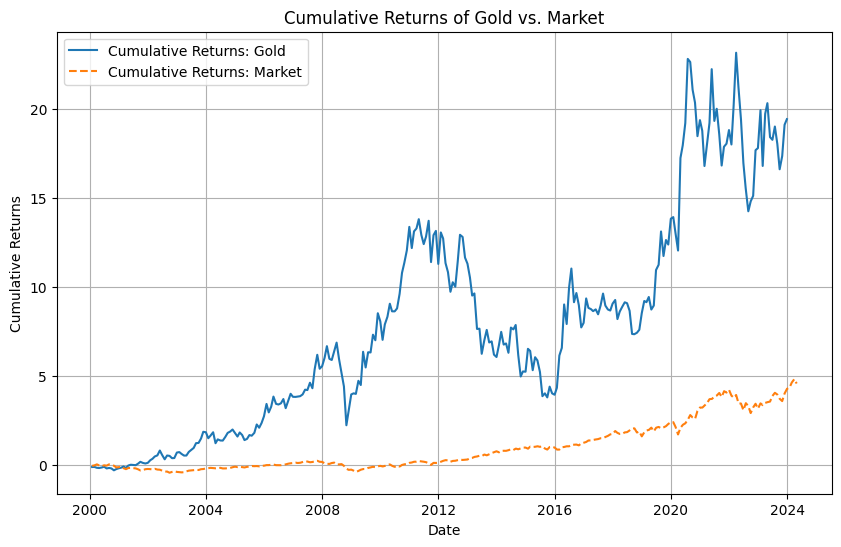

In [45]:
def plot_cumulative_returns(industry):
    # Ensure the industry exists in the DataFrame
    if industry not in monthly_returns_df.columns:
        print(f"Industry '{industry}' not found in the DataFrame.")
        return

    # Calculate cumulative returns
    cumulative_returns = (1 + monthly_returns_df[industry]).cumprod() - 1
    cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

    # Plot cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns.index, cumulative_returns, label=f'Cumulative Returns: {industry}')
    plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title(f'Cumulative Returns of {industry} vs. Market')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_cumulative_returns('Gold')

# All Industries Cumulative Returns Chart

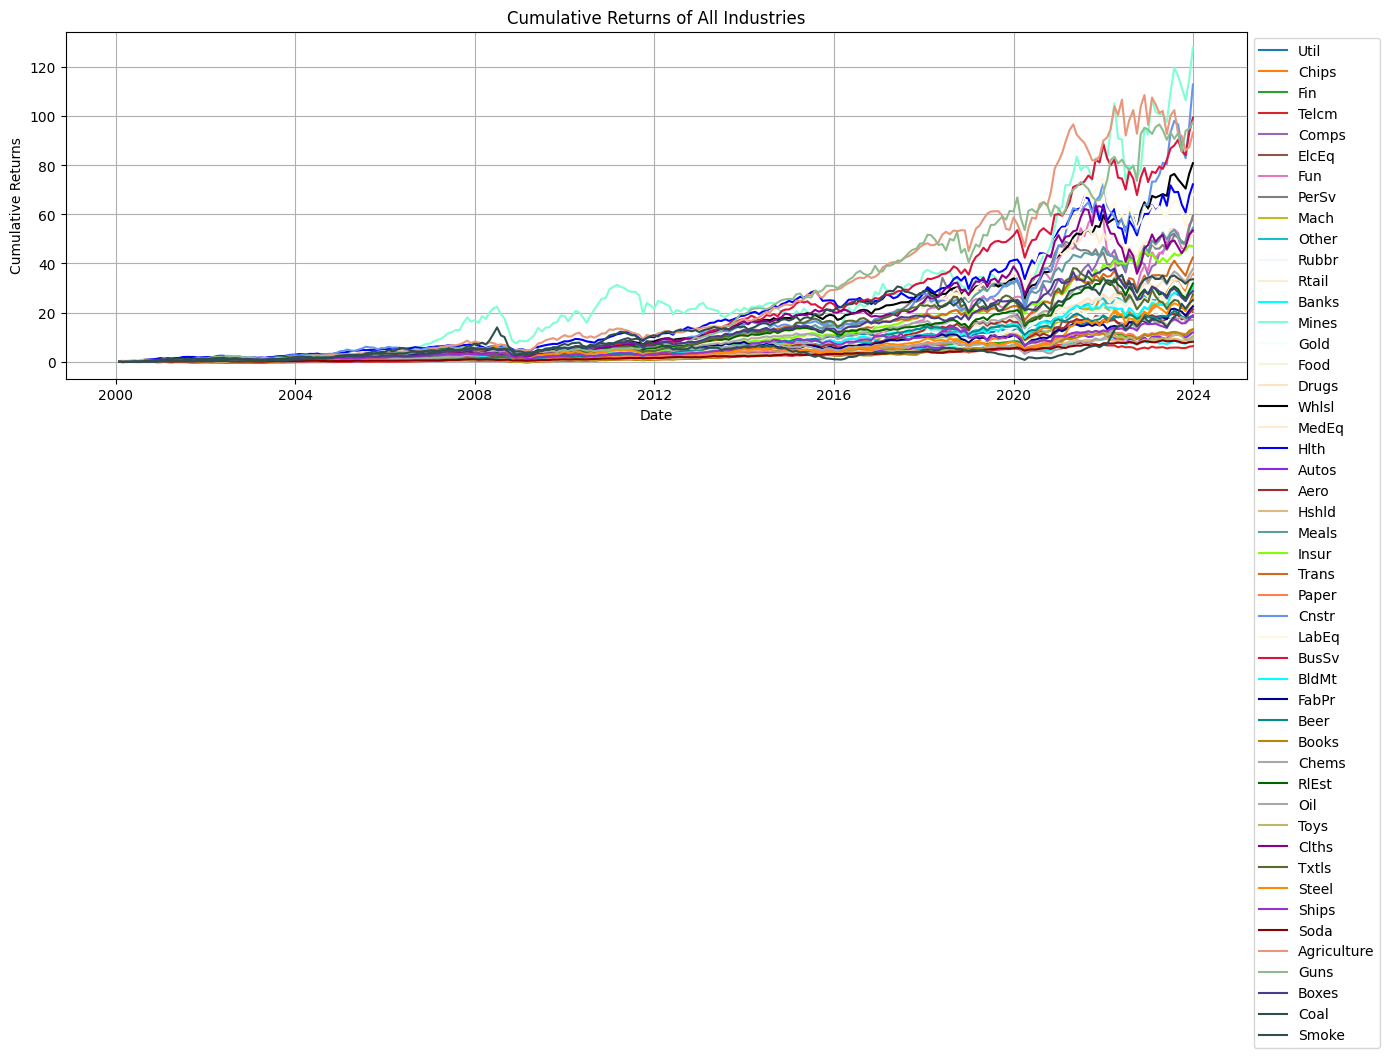

In [ ]:
def plot_all_industries_cumulative_returns():
    plt.figure(figsize=(14, 8))

    # Get a list of distinct colors
    colors = plt.cm.tab20.colors
    color_map = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())

    # Loop through each industry column in the DataFrame
    for i, industry in enumerate(monthly_returns_df.columns):
        # Calculate cumulative returns for the industry
        cumulative_returns = (1 + monthly_returns_df[industry]).cumprod() - 1

        # Assign a unique color to each industry line
        color = color_map[i % len(color_map)]

        # Plot cumulative returns for the industry
        plt.plot(cumulative_returns.index, cumulative_returns, label=industry, color=color)

    # Add labels, title, legend, and grid
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('Cumulative Returns of All Industries')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_all_industries_cumulative_returns()

# Performance Metrics for each Industry

In [ ]:
# Calculate performance metrics for each industry
metrics = []

for column in monthly_returns_df.columns:
    # Annualized returns and volatility
    monthly_returns = monthly_returns_df[column].interpolate(method='time')
    annual_returns = (1 + monthly_returns.mean())**12 - 1
    annual_volatility = monthly_returns.std() * np.sqrt(12)

    # Sharpe Ratio
    risk_free_rate = 0.0
    sharpe_ratio = (annual_returns - risk_free_rate) / annual_volatility

    # Beta and Alpha to market
    market_returns = ff5_factors['Mkt'].interpolate(method='time')
    common_index = monthly_returns.index.intersection(market_returns.index)
    monthly_returns = monthly_returns.loc[common_index]
    market_returns = market_returns.loc[common_index]

    X = sm.add_constant(market_returns)
    model = sm.OLS(monthly_returns, X).fit()
    alpha = model.params['const'] * 12  # annualize
    beta = model.params['Mkt']

    # Maximum Drawdown
    cumulative_returns = (1 + monthly_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    max_drawdown = drawdown.min()

    metrics.append({
        'Industry': column,
        'Avg Annual Returns': annual_returns,
        'Avg Annual Volatility': annual_volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Beta to Market': beta,
        'Alpha to Market': alpha,
        'Max Drawdown': max_drawdown
    })

# Convert the metrics list to a DataFrame
performance_metrics_df = pd.DataFrame(metrics)
performance_metrics_df

,Industry,Avg Annual Returns,Avg Annual Volatility,Sharpe Ratio,Beta to Market,Alpha to Market,Max Drawdown
0,Util,0.143297,0.145492,0.984915,0.522290,0.075292,-0.282372
1,Chips,0.211075,0.289899,0.728098,1.441628,0.097034,-0.471801
2,Fin,0.128947,0.156007,0.826547,0.909788,0.041478,-0.379186
3,Telcm,0.103238,0.176881,0.583661,0.960447,0.006914,-0.417795
4,Comps,0.219595,0.258387,0.849872,1.330376,0.115213,-0.426261
5,ElcEq,0.170591,0.256540,0.664967,1.275845,0.056065,-0.435305
6,Fun,0.224884,0.257976,0.871723,1.172275,0.137365,-0.507117
7,PerSv,0.213710,0.217679,0.981764,1.048799,0.107484,-0.264382
8,Mach,0.187942,0.241870,0.777037,1.331063,0.076701,-0.454333
9,Other,0.174314,0.185281,0.940810,0.468880,0.105266,-0.370408


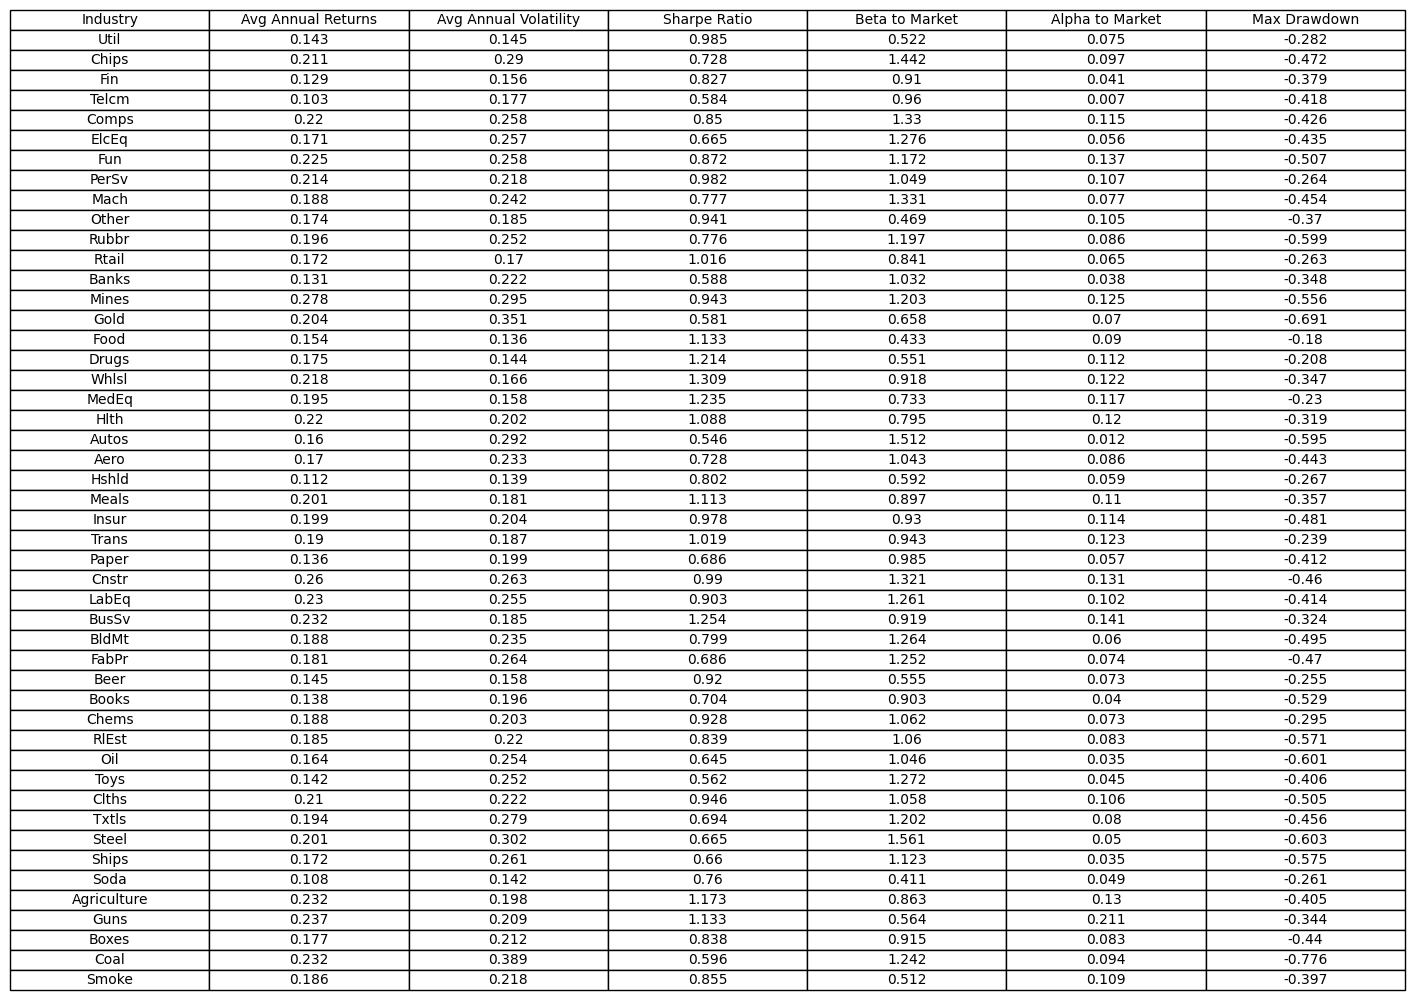

In [ ]:
# Assuming performance_metrics_df is already defined and contains the necessary data
performance_metrics_df = performance_metrics_df.round(3)  # Round numbers to 3 decimal places

# Plot the table
fig, ax = plt.subplots(figsize=(15, 8))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=performance_metrics_df.values, colLabels=performance_metrics_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()

In [ ]:
output_xlsx_path = '/content/performance_metrics_df.xlsx'
performance_metrics_df.to_excel(output_xlsx_path, index=False)

# Low Beta Portfolio

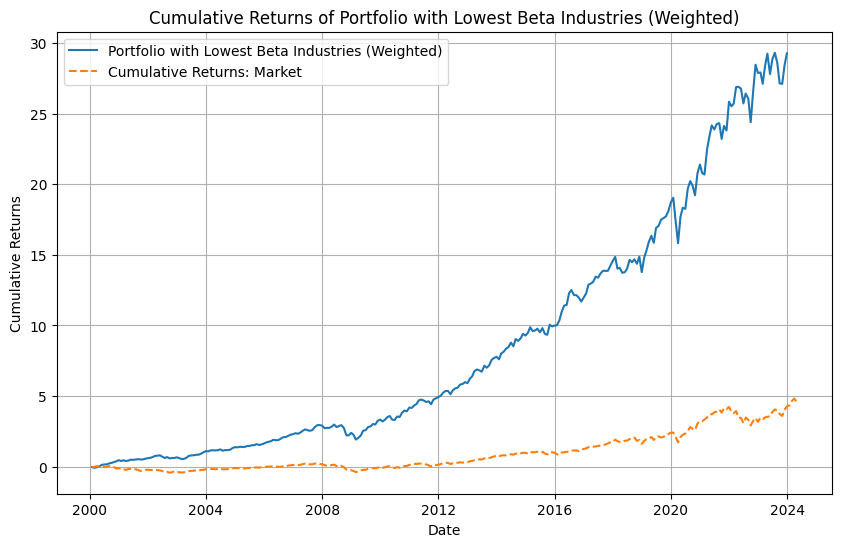

In [ ]:
# Identify the ten industries with the lowest Mkt-RF Coefficients
portfolio_stocks = all_metrics_df.nsmallest(10, 'Mkt-RF Coefficient')

# Get the list of industry identifiers
industry_identifiers = portfolio_stocks['Industry'].tolist()

# Filter the monthly returns DataFrame to include only the selected industries
selected_industry_returns = monthly_returns_df[industry_identifiers]

# Calculate the weights as the inverse of the squared Mkt-RF Coefficients
betas = portfolio_stocks['Mkt-RF Coefficient']
squared_betas = betas**2
weights = 1 / squared_betas

# Normalize these weights to sum to 1
weights /= weights.sum()

# Multiply the returns of each industry by the corresponding weights
weighted_returns = selected_industry_returns.multiply(weights.values, axis=1)

# Calculate the weighted portfolio returns
portfolio_returns = weighted_returns.sum(axis=1)

# Calculate cumulative returns
cumulative_returns_portfolio = (1 + portfolio_returns).cumprod() - 1
cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_portfolio.index, cumulative_returns_portfolio, label='Portfolio with Lowest Beta Industries (Weighted)')
plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Portfolio with Lowest Beta Industries (Weighted)')
plt.legend()
plt.grid(True)
plt.show()


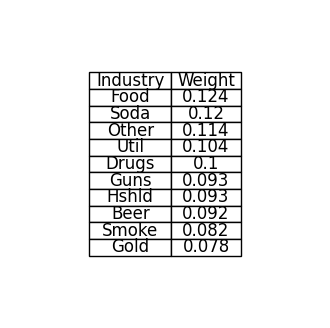

In [ ]:
# Create a DataFrame for industries and their weights
industries_weights_df = pd.DataFrame({
    'Industry': industry_identifiers,
    'Weight': weights.values.round(3)
})

# Display the industries and their weights as a visual table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=industries_weights_df.values, colLabels=industries_weights_df.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(industries_weights_df.columns))))

plt.show()


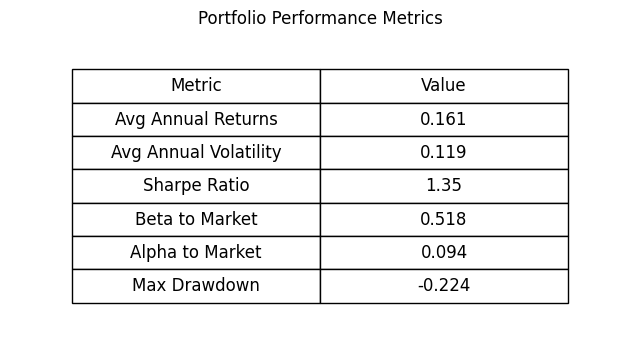

In [ ]:
def calculate_portfolio_metrics(portfolio_returns, market_returns, risk_free_rate=0.0):
    """
    Calculate performance metrics for a given portfolio.

    Args:
    portfolio_returns (pd.Series): Monthly returns of the portfolio.
    market_returns (pd.Series): Monthly returns of the market.
    risk_free_rate (float): Risk-free rate. Default is 0.0.

    Returns:
    pd.DataFrame: DataFrame containing performance metrics.
    """
    # Drop NA values
    monthly_returns = portfolio_returns.dropna()

    # Calculate annual returns and volatility
    annual_returns = (1 + monthly_returns.mean())**12 - 1
    annual_volatility = monthly_returns.std() * np.sqrt(12)

    # Calculate Sharpe Ratio
    sharpe_ratio = (annual_returns - risk_free_rate) / annual_volatility

    # Align the portfolio returns and market returns
    common_index = monthly_returns.index.intersection(market_returns.index)
    monthly_returns = monthly_returns.loc[common_index]
    market_returns = market_returns.loc[common_index]

    # Calculate Alpha and Beta to market using OLS regression
    X = sm.add_constant(market_returns)
    model = sm.OLS(monthly_returns, X).fit()
    alpha = model.params['const'] * 12  # annualize
    beta = model.params['Mkt']

    # Calculate maximum drawdown
    cumulative_returns = (1 + monthly_returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()

    # Create a DataFrame to store the metrics
    portfolio_metrics = pd.DataFrame({
        'Metric': ['Avg Annual Returns', 'Avg Annual Volatility', 'Sharpe Ratio', 'Beta to Market', 'Alpha to Market', 'Max Drawdown'],
        'Value': [round(annual_returns, 3), round(annual_volatility, 3), round(sharpe_ratio, 3), round(beta, 3), round(alpha, 3), round(max_drawdown, 3)]
    })

    # Plot the table
    fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=portfolio_metrics.values, colLabels=portfolio_metrics.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(0.8, 2)

    plt.title('Portfolio Performance Metrics')
    plt.show()

    return portfolio_metrics

# Example usage
market_returns = ff5_factors['Mkt'].dropna()
portfolio_metrics = calculate_portfolio_metrics(portfolio_returns, market_returns)

# Top Industries Bar Chart

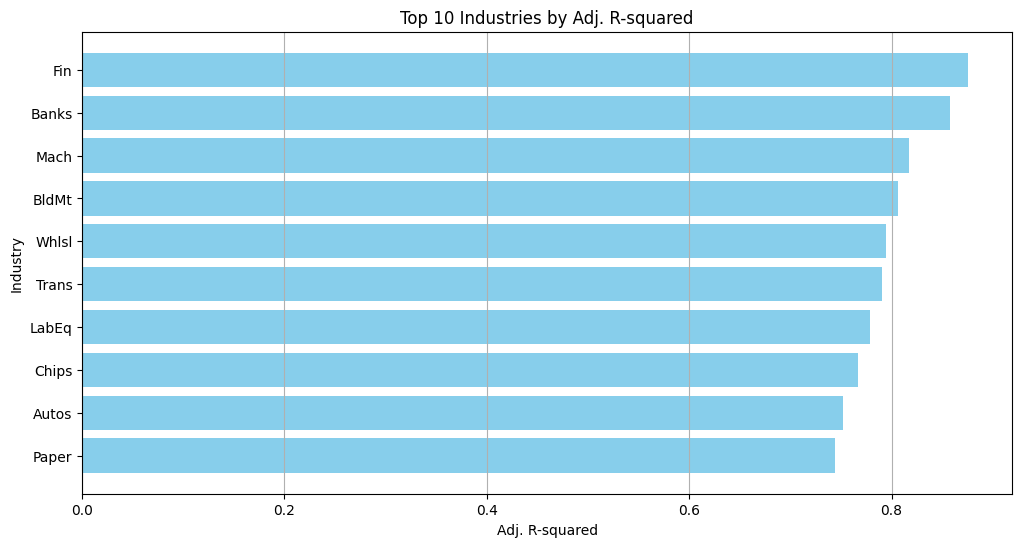

In [ ]:
# Sort the DataFrame by adjusted R-squared and select the top 10 industries
top_10_adj_r_squared = all_metrics_df.nlargest(10, 'Adj. R-squared')

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_adj_r_squared['Industry'], top_10_adj_r_squared['Adj. R-squared'], color='skyblue')
plt.xlabel('Adj. R-squared')
plt.ylabel('Industry')
plt.title('Top 10 Industries by Adj. R-squared')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.grid(axis='x')
plt.show()

# SMB (Size) Portfolio

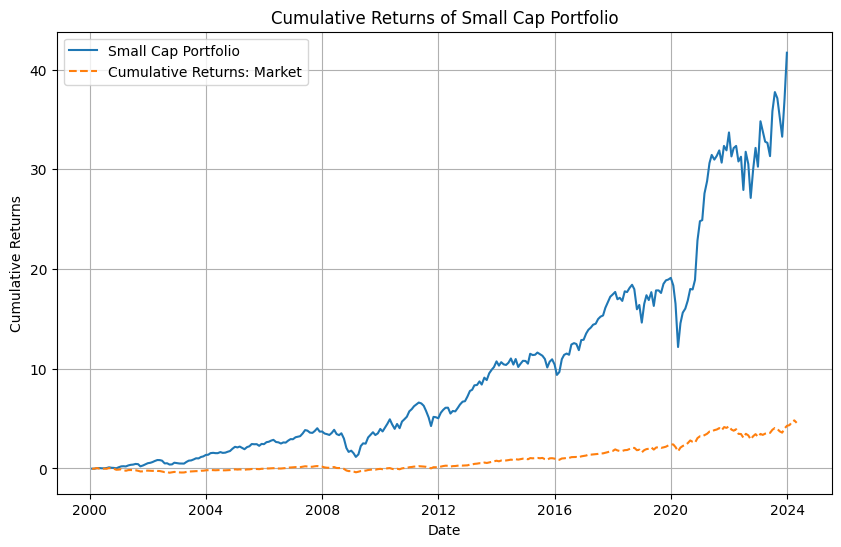

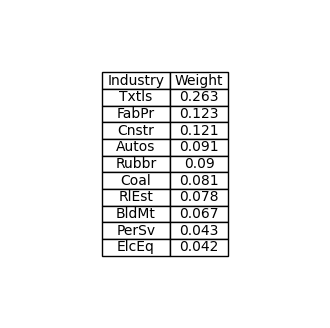

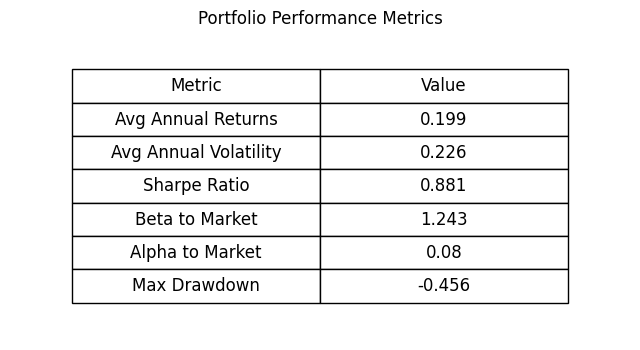

In [ ]:
# Construct the Small Cap Portfolio
small_cap_stocks = all_metrics_df.nlargest(10, 'SMB Coefficient')

# Get the list of industry identifiers
small_cap_industry_identifiers = small_cap_stocks['Industry'].tolist()

# Filter the monthly returns DataFrame to include only the selected industries
small_cap_industry_returns = monthly_returns_df[small_cap_industry_identifiers]

# Calculate the weights based on the SMB coefficients
small_cap_weights = small_cap_stocks['SMB Coefficient']**2
small_cap_weights /= small_cap_weights.sum()  # Normalize to sum to 1

# Calculate the weighted portfolio returns
small_cap_portfolio_returns = (small_cap_industry_returns * small_cap_weights.values).sum(axis=1)

# Calculate cumulative returns
cumulative_returns_small_cap = (1 + small_cap_portfolio_returns).cumprod() - 1
cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_small_cap.index, cumulative_returns_small_cap, label='Small Cap Portfolio')
plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Small Cap Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Display the weights
small_cap_weights_df = pd.DataFrame({'Industry': small_cap_industry_identifiers, 'Weight': small_cap_weights.round(3)})

# Display the industries and their weights as a visual table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=small_cap_weights_df.values, colLabels=small_cap_weights_df.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(small_cap_weights_df.columns))))
plt.show()

portfolio_metrics = calculate_portfolio_metrics(small_cap_portfolio_returns, market_returns)

# HML (Value) Portfolio

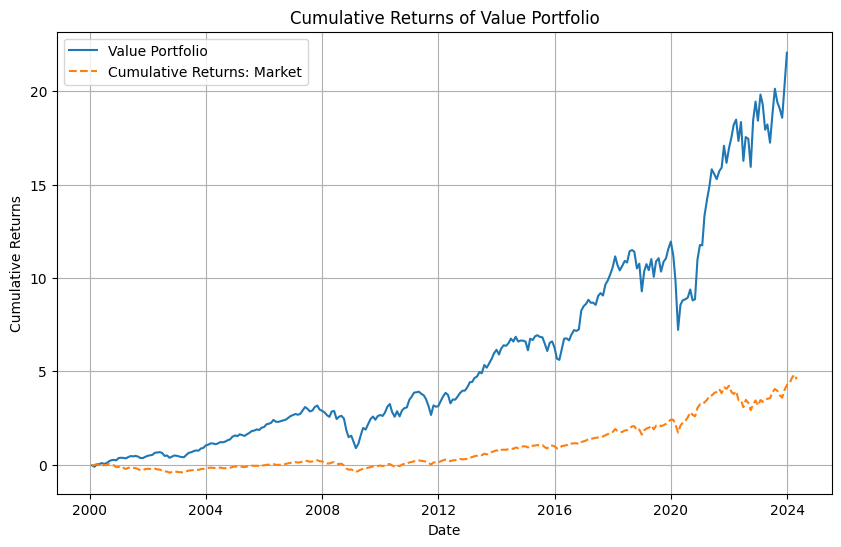

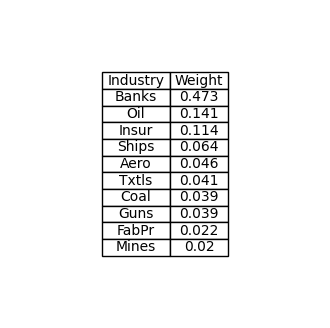

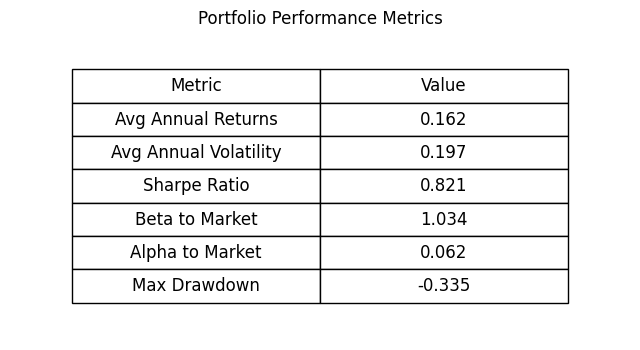

,Metric,Value
0,Avg Annual Returns,0.162
1,Avg Annual Volatility,0.197
2,Sharpe Ratio,0.821
3,Beta to Market,1.034
4,Alpha to Market,0.062
5,Max Drawdown,-0.335


In [ ]:
# Construct the Value Portfolio
value_stocks = all_metrics_df.nlargest(10, 'HML Coefficient')

# Get the list of industry identifiers
value_industry_identifiers = value_stocks['Industry'].tolist()

# Filter the monthly returns DataFrame to include only the selected industries
value_industry_returns = monthly_returns_df[value_industry_identifiers]

# Calculate the weights based on the HML coefficients
value_weights = value_stocks['HML Coefficient']**2
value_weights /= value_weights.sum()  # Normalize to sum to 1

# Calculate the weighted portfolio returns
value_portfolio_returns = (value_industry_returns * value_weights.values).sum(axis=1)

# Calculate cumulative returns
cumulative_returns_value = (1 + value_portfolio_returns).cumprod() - 1
cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_value.index, cumulative_returns_value, label='Value Portfolio')
plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Value Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Display the weights
value_weights_df = pd.DataFrame({'Industry': value_industry_identifiers, 'Weight': value_weights.round(3)})

# Display the industries and their weights as a visual table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=value_weights_df.values, colLabels=value_weights_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(value_weights_df.columns))))
plt.show()

# Calculate performance metrics for the Value Portfolio
portfolio_metrics = calculate_portfolio_metrics(value_portfolio_returns, market_returns)
portfolio_metrics


# RMW (Profitability) Portfolio

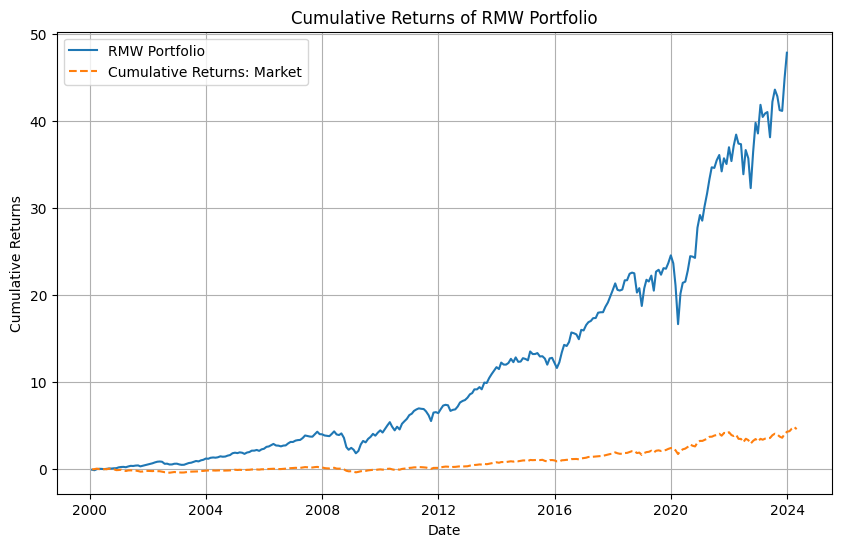

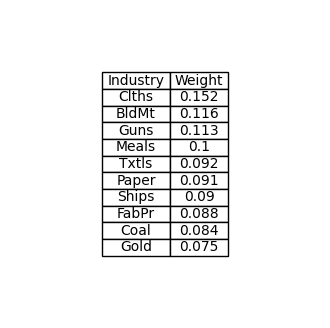

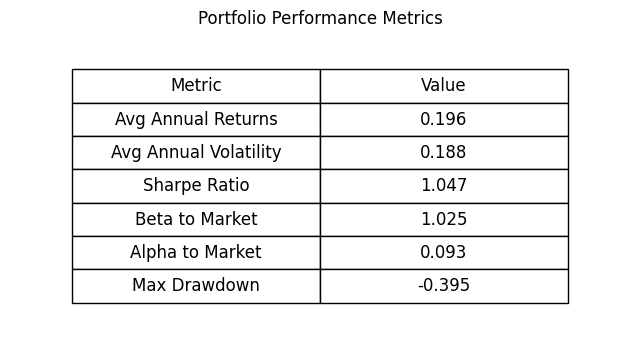

,Metric,Value
0,Avg Annual Returns,0.196
1,Avg Annual Volatility,0.188
2,Sharpe Ratio,1.047
3,Beta to Market,1.025
4,Alpha to Market,0.093
5,Max Drawdown,-0.395


In [ ]:
# Construct the RMW Portfolio
rmw_stocks = all_metrics_df.nlargest(10, 'RMW Coefficient')

# Get the list of industry identifiers
rmw_industry_identifiers = rmw_stocks['Industry'].tolist()

# Filter the monthly returns DataFrame to include only the selected industries
rmw_industry_returns = monthly_returns_df[rmw_industry_identifiers]

# Calculate the weights based on the RMW coefficients
rmw_weights = rmw_stocks['RMW Coefficient']**2
rmw_weights /= rmw_weights.sum()  # Normalize to sum to 1

# Calculate the weighted portfolio returns
rmw_portfolio_returns = (rmw_industry_returns * rmw_weights.values).sum(axis=1)

# Calculate cumulative returns
cumulative_returns_rmw = (1 + rmw_portfolio_returns).cumprod() - 1
cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_rmw.index, cumulative_returns_rmw, label='RMW Portfolio')
plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of RMW Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Display the weights
rmw_weights_df = pd.DataFrame({'Industry': rmw_industry_identifiers, 'Weight': rmw_weights.round(3)})

# Display the industries and their weights as a visual table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=rmw_weights_df.values, colLabels=rmw_weights_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(rmw_weights_df.columns))))
plt.show()

# Calculate performance metrics for the RMW Portfolio
portfolio_metrics = calculate_portfolio_metrics(rmw_portfolio_returns, market_returns)
portfolio_metrics


# CMA (Investment) Portfolio

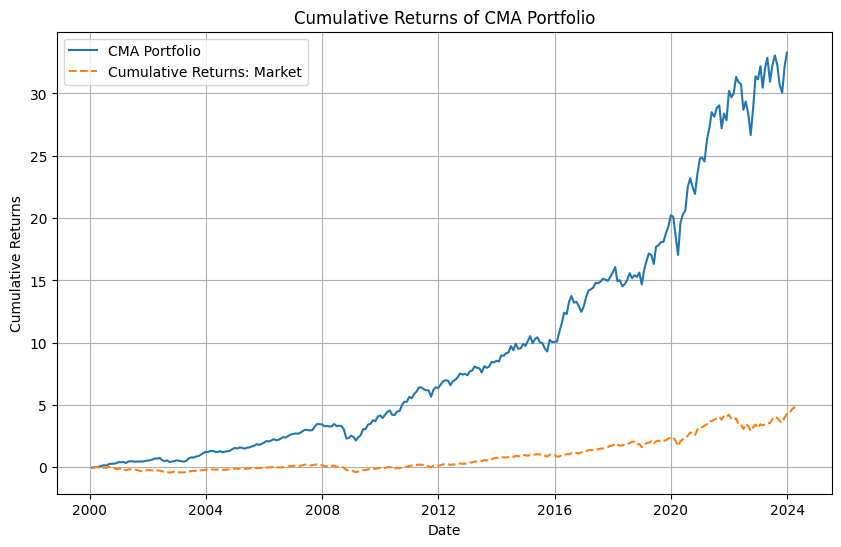

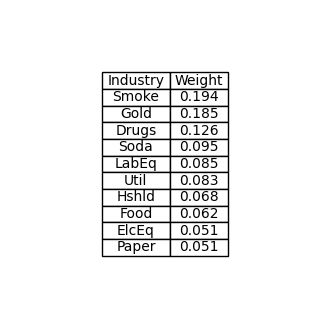

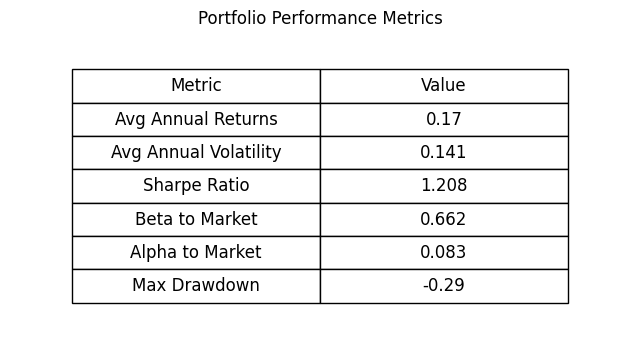

,Metric,Value
0,Avg Annual Returns,0.170
1,Avg Annual Volatility,0.141
2,Sharpe Ratio,1.208
3,Beta to Market,0.662
4,Alpha to Market,0.083
5,Max Drawdown,-0.290


In [ ]:
# Construct the CMA Portfolio
cma_stocks = all_metrics_df.nlargest(10, 'CMA Coefficient')

# Get the list of industry identifiers
cma_industry_identifiers = cma_stocks['Industry'].tolist()

# Filter the monthly returns DataFrame to include only the selected industries
cma_industry_returns = monthly_returns_df[cma_industry_identifiers]

# Calculate the weights based on the CMA coefficients
cma_weights = cma_stocks['CMA Coefficient']**2
cma_weights /= cma_weights.sum()  # Normalize to sum to 1

# Calculate the weighted portfolio returns
cma_portfolio_returns = (cma_industry_returns * cma_weights.values).sum(axis=1)

# Calculate cumulative returns
cumulative_returns_cma = (1 + cma_portfolio_returns).cumprod() - 1
cumulative_returns_Mkt = (1 + Mkt_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_cma.index, cumulative_returns_cma, label='CMA Portfolio')
plt.plot(cumulative_returns_Mkt.index, cumulative_returns_Mkt, label='Cumulative Returns: Market', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of CMA Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Display the weights
cma_weights_df = pd.DataFrame({'Industry': cma_industry_identifiers, 'Weight': cma_weights.round(3)})

# Display the industries and their weights as a visual table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cma_weights_df.values, colLabels=cma_weights_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cma_weights_df.columns))))
plt.show()

# Calculate performance metrics for the CMA Portfolio
portfolio_metrics = calculate_portfolio_metrics(cma_portfolio_returns, market_returns)
portfolio_metrics
